In [1]:
import cv2 as cv
import SimpleITK as sitk

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras.backend as K

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Concatenate, UpSampling2D, Input
from tensorflow.keras.models import Model

import os 

#cv2 (opencv library) and simpleitk to reading images
#tensorflow for building the Neural-Net model
#numpy for mathematical calculations
#pandas for reading csv files
#matplotlib for plotting images 
#os to read files in a directory
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    for k in range(len(physical_devices)):
        tf.config.experimental.set_memory_growth(physical_devices[k], True)
        tf.config.experimental
        print('memory growth:', tf.config.experimental.get_memory_growth(physical_devices[k]))
else:
    print("Not enough GPU hardware devices available")

memory growth: True


Using TensorFlow backend.


In [2]:
def loadDataTrain(path1, path2):
    
    X1, y1 = [], []
    train = os.listdir(path1)
    for images in train:
        print(images)
        img1 = sitk.ReadImage(os.path.join(path1,images))
        img = sitk.GetArrayFromImage(img1)/255.0               #image normalization
        
        mask = cv.imread(path2 + images[:-4] +'_segmentation.png')/255.0
            
        X1.append(img)                                         #appends the images
        y1.append(mask)                                        #appends the masks
    
    print("loadDataTrain begain")
    X1 = np.array(X1)
    y1 = np.array(y1)
    print("loadDataTrain finish")
     
    return X1,y1

In [3]:
def loadDataTest(path3, path4):
    
    X2, y2 = [], []
    test = os.listdir(path3)
    for images in test:
        print(images)
        img1 = sitk.ReadImage(os.path.join(path3,images))
        img = sitk.GetArrayFromImage(img1)/255.0
        
        mask = cv.imread(path4 + images[:-4] +'_segmentation.png')/255.0

        X2.append(img)
        y2.append(mask)
               
    X2 = np.array(X2)
    y2 = np.array(y2)

    
    return X2,y2

In [4]:
path1 = 'D:/Project/Lesion/Train/'
path2 = 'D:/Project/Lesion/Train_gt/'
path3 = 'D:/Project/Lesion/Test/'
path4 = 'D:/Project/Lesion/Test_gt/'

In [5]:
X_train, y_train = loadDataTrain(path1, path2)
print(X_train.shape)
print(y_train.shape)
X_test, y_test = loadDataTest(path3, path4)
print(X_test.shape)
print(y_test.shape)

ISIC_0000000.png
ISIC_0000001.png
ISIC_0000003.png
ISIC_0000004.png
ISIC_0000006.png
ISIC_0000007.png
ISIC_0000008.png
ISIC_0000009.png
ISIC_0000011.png
ISIC_0000012.png
ISIC_0000013.png
ISIC_0000014.png
ISIC_0000015.png
ISIC_0000016.png
ISIC_0000017.png
ISIC_0000018.png
ISIC_0000019.png
ISIC_0000020.png
ISIC_0000021.png
ISIC_0000022.png
ISIC_0000023.png
ISIC_0000024.png
ISIC_0000025.png
ISIC_0000026.png
ISIC_0000027.png
ISIC_0000028.png
ISIC_0000029.png
ISIC_0000030.png
ISIC_0000031.png
ISIC_0000032.png
ISIC_0000034.png
ISIC_0000035.png
ISIC_0000036.png
ISIC_0000037.png
ISIC_0000038.png
ISIC_0000039.png
ISIC_0000040.png
ISIC_0000041.png
ISIC_0000042.png
ISIC_0000043.png
ISIC_0000044.png
ISIC_0000045.png
ISIC_0000046.png
ISIC_0000047.png
ISIC_0000048.png
ISIC_0000049.png
ISIC_0000050.png
ISIC_0000051.png
ISIC_0000052.png
ISIC_0000053.png
ISIC_0000054.png
ISIC_0000055.png
ISIC_0000056.png
ISIC_0000057.png
ISIC_0000058.png
ISIC_0000059.png
ISIC_0000060.png
ISIC_0000061.png
ISIC_0000062.p

ISIC_0001213.png
ISIC_0001216.png
ISIC_0001242.png
ISIC_0001247.png
ISIC_0001254.png
ISIC_0001262.png
ISIC_0001267.png
ISIC_0001275.png
ISIC_0001286.png
ISIC_0001292.png
ISIC_0001296.png
ISIC_0001299.png
ISIC_0001306.png
ISIC_0001367.png
ISIC_0001372.png
ISIC_0001374.png
ISIC_0001385.png
ISIC_0001423.png
ISIC_0001427.png
ISIC_0001442.png
ISIC_0001449.png
ISIC_0001769.png
ISIC_0001852.png
ISIC_0001871.png
ISIC_0001960.png
ISIC_0002093.png
ISIC_0002107.png
ISIC_0002206.png
ISIC_0002246.png
ISIC_0002251.png
ISIC_0002287.png
ISIC_0002353.png
ISIC_0002374.png
ISIC_0002438.png
ISIC_0002439.png
ISIC_0002453.png
ISIC_0002459.png
ISIC_0002469.png
ISIC_0002476.png
ISIC_0002488.png
ISIC_0002489.png
ISIC_0002616.png
ISIC_0002647.png
ISIC_0002673.png
ISIC_0002780.png
ISIC_0002806.png
ISIC_0002829.png
ISIC_0002836.png
ISIC_0002871.png
ISIC_0002879.png
ISIC_0002885.png
ISIC_0002948.png
ISIC_0002975.png
ISIC_0002976.png
ISIC_0003005.png
ISIC_0003056.png
ISIC_0003174.png
ISIC_0003308.png
ISIC_0003346.p

ISIC_0010588.png
ISIC_0010589.png
ISIC_0010590.png
ISIC_0010591.png
ISIC_0010592.png
ISIC_0010593.png
ISIC_0010595.png
ISIC_0010596.png
ISIC_0010597.png
ISIC_0010598.png
ISIC_0010599.png
ISIC_0010602.png
ISIC_0010603.png
ISIC_0010604.png
ISIC_0010605.png
ISIC_0010606.png
ISIC_0010607.png
ISIC_0010844.png
ISIC_0010846.png
ISIC_0010847.png
ISIC_0010848.png
ISIC_0010849.png
ISIC_0010850.png
ISIC_0010851.png
ISIC_0010852.png
ISIC_0010853.png
ISIC_0010854.png
ISIC_0010856.png
ISIC_0010857.png
ISIC_0010858.png
ISIC_0010860.png
ISIC_0010861.png
ISIC_0010862.png
ISIC_0010863.png
ISIC_0010864.png
ISIC_0011079.png
ISIC_0011081.png
ISIC_0011082.png
ISIC_0011083.png
ISIC_0011084.png
ISIC_0011085.png
ISIC_0011088.png
ISIC_0011089.png
ISIC_0011090.png
ISIC_0011092.png
ISIC_0011095.png
ISIC_0011097.png
ISIC_0011098.png
ISIC_0011099.png
ISIC_0011101.png
ISIC_0011102.png
ISIC_0011104.png
ISIC_0011105.png
ISIC_0011107.png
ISIC_0011109.png
ISIC_0011110.png
ISIC_0011112.png
ISIC_0011114.png
ISIC_0011115.p

ISIC_0013031.png
ISIC_0013032.png
ISIC_0013034.png
ISIC_0013035.png
ISIC_0013037.png
ISIC_0013039.png
ISIC_0013044.png
ISIC_0013045.png
ISIC_0013047.png
ISIC_0013048.png
ISIC_0013052.png
ISIC_0013053.png
loadDataTrain begain
loadDataTrain finish
(1500, 256, 256, 3)
(1500, 256, 256, 3)
ISIC_0013054.png
ISIC_0013055.png
ISIC_0013056.png
ISIC_0013063.png
ISIC_0013065.png
ISIC_0013070.png
ISIC_0013071.png
ISIC_0013072.png
ISIC_0013073.png
ISIC_0013075.png
ISIC_0013079.png
ISIC_0013082.png
ISIC_0013084.png
ISIC_0013086.png
ISIC_0013087.png
ISIC_0013089.png
ISIC_0013090.png
ISIC_0013094.png
ISIC_0013096.png
ISIC_0013104.png
ISIC_0013106.png
ISIC_0013109.png
ISIC_0013112.png
ISIC_0013114.png
ISIC_0013118.png
ISIC_0013120.png
ISIC_0013121.png
ISIC_0013124.png
ISIC_0013126.png
ISIC_0013128.png
ISIC_0013129.png
ISIC_0013134.png
ISIC_0013136.png
ISIC_0013140.png
ISIC_0013141.png
ISIC_0013146.png
ISIC_0013147.png
ISIC_0013150.png
ISIC_0013155.png
ISIC_0013159.png
ISIC_0013160.png
ISIC_0013163.png


In [6]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = UpSampling2D((2, 2))(x)
    concat = Concatenate()([us, skip])
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [16]:
import os
import numpy as np
import cv2

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
class ResUnet:
    def __init__(self, input_size=256):
        self.input_size = input_size

    def build_model(self):
        def conv_block(x, n_filter):
            x_init = x

            ## Conv 1
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Conv2D(n_filter, (1, 1), padding="same")(x)
            ## Conv 2
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Conv2D(n_filter, (3, 3), padding="same")(x)
            ## Conv 3
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
            x = Conv2D(n_filter, (1, 1), padding="same")(x)

            ## Shortcut
            s  = Conv2D(n_filter, (1, 1), padding="same")(x_init)
            s = BatchNormalization()(s)

            ## Add
            x = Add()([x, s])
            return x

        def resnet_block(x, n_filter, pool=True):
            x1 = conv_block(x, n_filter)
            c = x1

            ## Pooling
            if pool == True:
                x = MaxPooling2D((2, 2), (2, 2))(x1)
                return c, x
            else:
                return c

        n_filters = [16, 32, 64, 96, 128]
        inputs = Input((self.input_size, self.input_size, 3))

        c0 = inputs
        ## Encoder
        c1, p1 = resnet_block(c0, n_filters[0])
        c2, p2 = resnet_block(p1, n_filters[1])
        c3, p3 = resnet_block(p2, n_filters[2])
        c4, p4 = resnet_block(p3, n_filters[3])

        ## Bridge
        b1 = resnet_block(p4, n_filters[4], pool=False)
        b2 = resnet_block(b1, n_filters[4], pool=False)

        ## Decoder
        d1 = Conv2DTranspose(n_filters[3], (3, 3), padding="same", strides=(2, 2))(b2)
        #d1 = UpSampling2D((2, 2))(b2)
        d1 = Concatenate()([d1, c4])
        d1 = resnet_block(d1, n_filters[3], pool=False)

        d2 = Conv2DTranspose(n_filters[3], (3, 3), padding="same", strides=(2, 2))(d1)
        #d2 = UpSampling2D((2, 2))(d1)
        d2 = Concatenate()([d2, c3])
        d2 = resnet_block(d2, n_filters[2], pool=False)

        d3 = Conv2DTranspose(n_filters[3], (3, 3), padding="same", strides=(2, 2))(d2)
        #d3 = UpSampling2D((2, 2))(d2)
        d3 = Concatenate()([d3, c2])
        d3 = resnet_block(d3, n_filters[1], pool=False)

        d4 = Conv2DTranspose(n_filters[3], (3, 3), padding="same", strides=(2, 2))(d3)
        #d4 = UpSampling2D((2, 2))(d3)
        d4 = Concatenate()([d4, c1])
        d4 = resnet_block(d4, n_filters[0], pool=False)

        ## output
        outputs = Conv2D(1, (1, 1), padding="same")(d4)
        outputs = BatchNormalization()(outputs)
        outputs = Activation("sigmoid")(outputs)

        ## Model
        model = Model(inputs, outputs)
        return model

In [8]:
def UNet():
    f = [16, 32, 64, 128, 256]
    
    inputs=Input((256,256,3))
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) 
    c2, p2 = down_block(p1, f[1]) 
    c3, p3 = down_block(p2, f[2]) 
    c4, p4 = down_block(p3, f[3]) 
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) 
    u2 = up_block(u1, c3, f[2]) 
    u3 = up_block(u2, c2, f[1]) 
    u4 = up_block(u3, c1, f[0]) 
    
    outputs = Conv2D(3, (1, 1), padding="same", activation="sigmoid")(u4)
    model = Model(inputs, outputs)
    return model

In [8]:
smooth =1e-3
def dice_coef(y_true, y_pred): 
    y_true_f = tf.keras.layers.Flatten()(y_true) 
    y_pred_f = tf.keras.layers.Flatten()(y_pred) 
    intersection = tf.reduce_sum(y_true_f * y_pred_f) 
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth) 
def dice_loss(y_true, y_pred): 
    return 1.0 - dice_coef(y_true, y_pred) 

In [9]:
def dice_coe_cup(img1,img2):
    f = h = 0
    height, width = 256, 256
    for k in range(height):
        for j in range(width):
            if img1[k][j][0] > 0 :
                f += 1
            if img2[k][j][0] > 0 :
                f += 1
            if img1[k][j][0] > 0 and img2[k][j][0] > 0:
                h += 1

    g = 2*h/f
    return(g)

In [17]:
arch = ResUnet() 
model = arch.build_model() 
model.compile(optimizer="adam", loss=dice_loss, metrics=[dice_coef])
model.summary()                   #gives the summary of the model with all interconnected layers

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 256, 256, 3)  12          input_5[0][0]                    
__________________________________________________________________________________________________
activation_7 (Activation)       (None, 256, 256, 3)  0           batch_normalization_10[0][0]     
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 256, 256, 16) 64          activation_7[0][0]               
______________________________________________________________________________________________

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

train_gen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rescale=1.,
                                   zoom_range=0.2,
                                   fill_mode='nearest',
                                   cval=0)

test_gen = ImageDataGenerator(rescale=1.)

In [19]:
batch_size = 1
r = model.fit_generator(train_gen.flow(X_train, y_train, batch_size),
                       steps_per_epoch=(len(X_train)) // batch_size,
                       epochs=10, 
                       validation_data=test_gen.flow(X_test, y_test, batch_size),
                       validation_steps=(len(X_test)) // batch_size,
                   )

Epoch 1/10


InvalidArgumentError: Incompatible shapes: [1,196608] vs. [1,65536] [Op:Mul] name: loss/activation_37_loss/mul/

In [12]:
model.save("UNet.h5")

In [13]:
model_final = tf.keras.models.load_model('UNet.h5',custom_objects={'dice_loss':dice_loss,'dice_coef': dice_coef})

In [14]:
predict_path_raw = 'D:/Project/Lesion/Val/'
predict_path_mask= 'D:/Project/Lesion/Val_gt/'

predict_raw = os.listdir(predict_path_raw)

predict_mask = os.listdir(predict_path_mask)

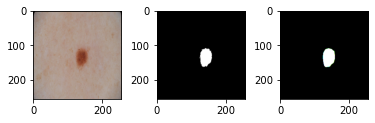

In [92]:
import random
m = random.randint(0, len(predict_raw)-1)

img_raw=sitk.ReadImage(os.path.join(predict_path_raw,predict_raw[m]))
img_array_raw= sitk.GetArrayFromImage(img_raw)
img_array_raw=img_array_raw/255.0

testing=np.expand_dims(img_array_raw, axis=0)

img_array_mask=cv.imread(os.path.join(predict_path_mask,predict_mask[m]))
img_array_mask=img_array_mask/255.0


result= model_final.predict(testing)               # used to predict the result
result=result>0.5
predict_result =np.squeeze(result,axis=0)

fig = plt.figure()                                # plotting the results
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)                     # the original validation image
ax.imshow(img_array_raw)

ax = fig.add_subplot(1, 3, 2)                     # the ground truth provided
ax.imshow(img_array_mask, cmap="gray")

ax = fig.add_subplot(1, 3, 3)                     # segmentation predicted by our neural net model
ax.imshow(predict_result*255, cmap="gray")